In [1]:
#In this workbook I: 
# --remove all ROIS which have a zero value
# --calculate column means (overall and per slice)
# --normalize columns within slices and set their mean to the overall column mean


import normalization as nrm
import pandas as pd


In [2]:
#import imaging data
roi_df = pd.read_csv("C:/Users/chris/Desktop/projects/optometry/jupyter/BM_AM_180808_190401.csv")
#roi_df=pd.read_csv("/Users/amanda/Desktop/mIHC_Analysis-master/BM_AM_180808_190312_Results.csv")

In [3]:
#remove rows with zeros
roi_df = roi_df[roi_df['CD15_mean'] > 0]
roi_df = roi_df[roi_df['GLT-1_mean'] > 0]
roi_df = roi_df[roi_df['Cav3.1_mean'] > 0]
roi_df = roi_df[roi_df['CABP5_mean'] > 0]
roi_df = roi_df[roi_df['SSCGN_mean'] > 0]
roi_df = roi_df[roi_df['Kv2.2_mean'] > 0]
roi_df = roi_df[roi_df['CAVIII_mean'] > 0]
roi_df = roi_df[roi_df['Rec_mean'] > 0]
roi_df = roi_df[roi_df['Calb_mean'] > 0]
roi_df = roi_df[roi_df['PKC_mean'] > 0]
roi_df = roi_df[roi_df['Parv_mean'] > 0]
roi_df = roi_df[roi_df['DAPI5_mean'] > 0]

In [4]:
roi_df.columns.values.tolist()

['image ',
 'total cell index',
 'ind cell index',
 'Area',
 'Circ.',
 'AR',
 'Round',
 'Solidity',
 '% depth',
 'Tarpg3_mean',
 'Islet1_mean',
 'Pax6_mean',
 'DAPI_mean',
 'CD15_mean',
 'GLT-1_mean',
 'Cav3.1_mean',
 'DAPI2_mean',
 'CABP5_mean',
 'SSCGN_mean',
 'Kv2.2_mean',
 'DAPI3_mean',
 'CAVIII_mean',
 'Rec_mean',
 'DAPI4_mean',
 'Calb_mean',
 'PKC_mean',
 'Parv_mean',
 'DAPI5_mean',
 'Tarpg3_stddev',
 'Islet1_stddev',
 'Pax6_stddev',
 'DAPI_stddev',
 'CD15_stddev',
 'GLT-1_stddev',
 'Cav3.1_stddev',
 'DAPI2_stddev',
 'CABP5_stddev',
 'SCGN_stddev',
 'Kv2.2_stddev',
 'DAPI3_stddev',
 'CAVIII_stddev',
 'Rec_stddev',
 'DAPI4_stddev',
 'Calb_stddev',
 'PKC_stddev',
 'Parv_stddev',
 'DAPI5_stddev',
 'Tarpg3_median',
 'Islet1_median',
 'Pax6_median',
 'DAPI_median',
 'CD15_median',
 'GLT-1_median',
 'Cav3.1_median',
 'DAPI2_median',
 'CABP5_median',
 'SCGN_median',
 'Kv2.2_median',
 'DAPI3_median',
 'CAVIII_median',
 'Rec_median',
 'DAPI4_median',
 'Calb_median',
 'PKC_median',
 'Parv_

In [5]:
columnsAnalyze=['Pax6_mean', 'Islet1_mean', 'Tarpg3_mean', 'DAPI_mean', 'CD15_mean', 'GLT-1_mean', 'Cav3.1_mean', 'DAPI2_mean', 'CABP5_mean', 'SSCGN_mean', 'Kv2.2_mean', 'DAPI3_mean', 'CAVIII_mean', 'Rec_mean', 'DAPI4_mean', 'Calb_mean', 'PKC_mean', 'Parv_mean', 'DAPI5_mean', 'Pax6_stddev', 'Islet1_stddev', 'Tarpg3_stddev', 'DAPI_stddev', 'CD15_stddev', 'GLT-1_stddev', 'Cav3.1_stddev', 'DAPI2_stddev', 'CABP5_stddev', 'SCGN_stddev', 'Kv2.2_stddev', 'DAPI3_stddev', 'CAVIII_stddev', 'Rec_stddev', 'DAPI4_stddev', 'Calb_stddev', 'PKC_stddev', 'Parv_stddev', 'DAPI5_stddev', 'Pax6_median', 'Islet1_median', 'Tarpg3_median', 'DAPI_median','CD15_median','GLT-1_median','Cav3.1_median','DAPI2_median','CABP5_median','SCGN_median','Kv2.2_median', 'DAPI3_median','CAVIII_median','Rec_median','DAPI4_median', 'Calb_median','PKC_median','Parv_median','DAPI5_median']


#calculate mean intensities across slices
indMean_df=nrm.meanSTD(roi_df, columnsAnalyze, 5)

#indMean_df.set_index('slide')
indMean_df.set_index(['slide','col'], inplace=True)
indMean_df.head(5)

,,mean,std
slide,col,,
23_s1,CABP5_mean,3274.415410,885.806824
23_s2,CABP5_mean,3142.900701,1024.690157
21_s2,CABP5_mean,2373.893585,554.581519
21_s1,CABP5_mean,3039.167167,654.648785
21_s2,CABP5_median,2344.727993,558.762428


In [6]:
#calculates mean of the whole data set to determine the center point to normalize to
totalMean_df=nrm.meanSTD(roi_df, columnsAnalyze, 1)

#totalMean_df.set_index('col')
totalMean_df.set_index(['col'], inplace=True)
totalMean_df

,slide,mean,std
col,,,
CABP5_mean,2,3042.347338,904.426231
CABP5_median,2,2996.030854,916.675940
CABP5_stddev,2,357.665584,300.182615
CAVIII_mean,2,2445.844828,834.923602
CAVIII_median,2,2373.400226,839.969815
CAVIII_stddev,2,403.381498,306.795167
CD15_mean,2,1592.813135,273.844052
CD15_median,2,1576.130817,260.972343
CD15_stddev,2,100.329419,106.721282


In [7]:
#NORMALIZE ACROSS SLICES

roi_df_new3 = roi_df.copy() #create new roi_df to do stuff to

for j in range(len(columnsAnalyze)): #loop through all columns specified by columns Analyze
    k=roi_df.columns.get_loc(columnsAnalyze[j])
    print('working on column', k)
    for i in range(roi_df.shape[0]): # loop through all rows in roi_df
          
        #test = roi_df.iloc[[i],[k]]
        #if type(test.iat[0,0]) is str or float: #if the value at this row and col is a string or float, bail
        #    continue
            
        #find the current slide and column names
        slide = roi_df.iloc[i,0] #uses row# and finds corresponding image name
        slide=slide[0:5] #cuts image name from 21_s1m1 to 21_s1
        col = list(roi_df)[k] #returns title of that column
        #print(slide)
    
        #get the value from the indMean_df table given the col and slide
        y=indMean_df.loc[((slide,col),'mean')]
        z=totalMean_df.loc[((col),'mean')]
        roi_df_new3.iloc[[i],[k]] = (roi_df.iloc[[i],[k]] / y)*z      

working on column 11
working on column 10
working on column 9


In [8]:
roi_df_new3

,image,total cell index,ind cell index,Area,Circ.,AR,Round,Solidity,% depth,Tarpg3_mean,...,SCGN_median,Kv2.2_median,DAPI3_median,CAVIII_median,Rec_median,DAPI4_median,Calb_median,PKC_median,Parv_median,DAPI5_median
0,21_s1m1,0,0,0.049,0.857,1.450,0.690,0.897,5.259663,367.874005,...,505,2338,1388,2062,3104,559,631,930,504,2476
1,21_s1m1,1,1,0.058,0.878,1.135,0.881,0.892,22.574779,421.173668,...,1697,2525,2154,2047,2348,580,619,673,305,3681
2,21_s1m1,2,2,0.068,0.708,1.663,0.601,0.864,70.322646,525.712353,...,352,2422,3321,1770,1447,796,674,701,250,6501
3,21_s1m1,3,3,0.067,0.763,1.336,0.749,0.863,54.642624,454.974859,...,446,2413,2483,2195,3119,654,672,754,258,5217
4,21_s1m1,4,4,0.099,0.799,1.435,0.697,0.887,17.882495,515.982637,...,391,2381,2049,2041,2497,580,649,846,393,3349
5,21_s1m1,5,5,0.060,0.828,1.496,0.669,0.884,43.863270,383.504012,...,385,2334,2362,2072,3983,637,687,905,300,4595
6,21_s1m1,6,6,0.047,0.785,1.133,0.883,0.854,12.329750,626.757152,...,439,2360,1711,2289,2944,587,767,1619,1376,2533
7,21_s1m1,7,7,0.080,0.496,1.602,0.624,0.833,45.541148,468.165002,...,369,2334,2389,2076,2292,659,1297,1231,1081,4436
8,21_s1m1,8,8,0.091,0.592,1.395,0.717,0.838,21.534774,453.692188,...,432,2328,1781,1737,2664,552,682,687,297,2800
9,21_s1m1,9,9,0.118,0.588,1.331,0.751,0.794,68.174310,587.855016,...,381,2413,2832,1963,1578,801,674,697,256,5124


In [9]:
roi_df

,image,total cell index,ind cell index,Area,Circ.,AR,Round,Solidity,% depth,Tarpg3_mean,...,SCGN_median,Kv2.2_median,DAPI3_median,CAVIII_median,Rec_median,DAPI4_median,Calb_median,PKC_median,Parv_median,DAPI5_median
0,21_s1m1,0,0,0.049,0.857,1.450,0.690,0.897,5.259663,395.788,...,505,2338,1388,2062,3104,559,631,930,504,2476
1,21_s1m1,1,1,0.058,0.878,1.135,0.881,0.892,22.574779,453.132,...,1697,2525,2154,2047,2348,580,619,673,305,3681
2,21_s1m1,2,2,0.068,0.708,1.663,0.601,0.864,70.322646,565.603,...,352,2422,3321,1770,1447,796,674,701,250,6501
3,21_s1m1,3,3,0.067,0.763,1.336,0.749,0.863,54.642624,489.498,...,446,2413,2483,2195,3119,654,672,754,258,5217
4,21_s1m1,4,4,0.099,0.799,1.435,0.697,0.887,17.882495,555.135,...,391,2381,2049,2041,2497,580,649,846,393,3349
5,21_s1m1,5,5,0.060,0.828,1.496,0.669,0.884,43.863270,412.604,...,385,2334,2362,2072,3983,637,687,905,300,4595
6,21_s1m1,6,6,0.047,0.785,1.133,0.883,0.854,12.329750,674.315,...,439,2360,1711,2289,2944,587,767,1619,1376,2533
7,21_s1m1,7,7,0.080,0.496,1.602,0.624,0.833,45.541148,503.689,...,369,2334,2389,2076,2292,659,1297,1231,1081,4436
8,21_s1m1,8,8,0.091,0.592,1.395,0.717,0.838,21.534774,488.118,...,432,2328,1781,1737,2664,552,682,687,297,2800
9,21_s1m1,9,9,0.118,0.588,1.331,0.751,0.794,68.174310,632.461,...,381,2413,2832,1963,1578,801,674,697,256,5124


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E56E47828>]],
      dtype=object)

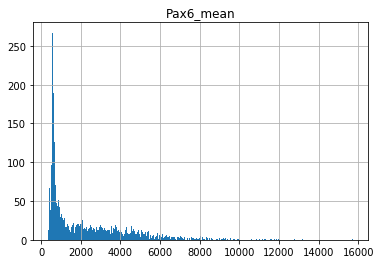

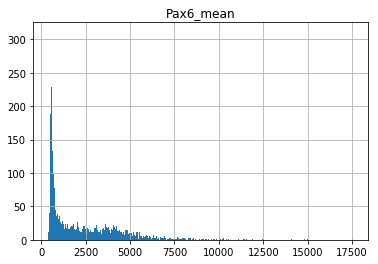

In [10]:
#visualize changes
roi_df.hist(column='Pax6_mean', bins=1000)
roi_df_new3.hist(column='Pax6_mean', bins=1000)

In [11]:
roi_df_new3['CD15_mean'].quantile([.25, .7, .85, .99])

0.25    1407.68600
0.70    1684.99120
0.85    1840.94540
0.99    2556.75468
Name: CD15_mean, dtype: float64

In [12]:
def new2(signal):
    if (signal<1482):
        return 1
    if (signal>1482 and signal<1690):
        return 2
    if (signal>1690 and signal<1824):
        return 3
    if (signal>1824):
        return 4

In [ ]:
for c in roi_df_new3['CD15_mean']:
    d=new2(c)
    #roi_df_new3['Pax6_quartiles']=d
    print(d)

In [ ]:
roi_df_new3.to_csv(path_or_buf='C:/Users/mclaughlin.aj/Desktop/quartiles.csv',columns=['image ', 'ind cell index','Pax6_quartiles','Pax6_mean'])

In [16]:
def quantileCSV(df, col, quantList, colors, csvLoc='C:/Users/mclaughlin.aj/Desktop/quartiles.csv'):
    '''Given df, col, quantList, csvLocation, and colors, create a csv in the location with the quantList data.'''
    assert(len(quantList) == 4 and len(colors) == 4), "quantList and colors must be of size 4!"
    one, two, three, four = df[col].quantile(quantList).get(quantList[0]), df[col].quantile(quantList).get(quantList[1]), df[col].quantile(quantList).get(quantList[2]), df[col].quantile(quantList).get(quantList[3])
    resultColors = []
    for signal in df[col]:
        c = None
        if (signal<one):
            c = colors[0]
        if (signal>one and signal<two):
            c = colors[1]
        if (signal>two and signal<three):
            c = colors[2]
        if (signal>three):
            c = colors[3]
        resultColors += [c]
    pd.DataFrame(resultColors).to_csv(csvLoc, index=False)

In [17]:
quantileCSV(roi_df_new3, 'CD15_mean', [.25, .7, .85, .99], ["red", "green", "blue", "yellow"], 'C:/Users/Chris/Desktop/quartiles.csv')